In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import r2_score
import sys
import os

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

In [3]:
sm = StructureModel()

In [4]:
x = pd.read_csv('../test_tables/structured_student_r.csv')

In [5]:
x.fillna(0, inplace=True)

In [6]:
data = x
data = data[np.logical_not(data['score'].isna())]

In [7]:

Y1 = data['weighted_score']/100
Y2 = data['score']/100
#data['mean'] = np.round(data['mean']/10)

#Y2 = data['"ARTERIAL_DIAS"']
#data.drop(['score', 'weighted_score'] ,axis = 1, inplace = True)
X = data
X2 = data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
     X, Y1, test_size=0.33, random_state=42)

In [10]:

sm = from_pandas(X_test, w_threshold = 0.8, max_iter = 5)

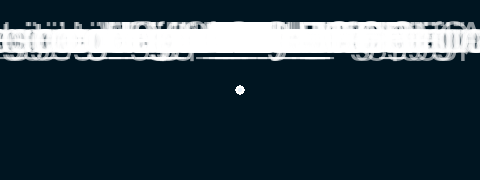

In [18]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
sm.remove_edges_below_threshold(0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [43]:
vec = []
for edge in sm.edges:
    if (edge[1])=='score' :
        vec.append(edge[0])
    if (edge[0])=='score':
        vec.append(edge[1])

In [44]:
vec

['age_band',
 'weighted_score',
 'first',
 'code_module_AAA',
 'code_module_BBB',
 'code_module_DDD',
 'code_module_EEE',
 'code_module_FFF',
 'code_module_GGG',
 'code_presentation_B',
 'code_presentation_J',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'disability_N',
 'disability_Y']

In [45]:
for edge in sm.edges:
    if (edge[1])=='weighted_score' :
        vec.append(edge[0])
    if (edge[0])=='weighted_score':
        vec.append(edge[1])
    

In [46]:
vec

['age_band',
 'weighted_score',
 'first',
 'code_module_AAA',
 'code_module_BBB',
 'code_module_DDD',
 'code_module_EEE',
 'code_module_FFF',
 'code_module_GGG',
 'code_presentation_B',
 'code_presentation_J',
 'gender_F',
 'gender_M',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'disability_N',
 'disability_Y',
 'age_band',
 'num_of_prev_attempts',
 'score',
 'code_module_AAA',
 'code_module_CCC',
 'code_module_DDD',
 'code_module_EEE',
 'code_module_FFF',
 'code_module_GGG',
 'code_p

In [47]:
set(vec)

{'age_band',
 'code_module_AAA',
 'code_module_BBB',
 'code_module_CCC',
 'code_module_DDD',
 'code_module_EEE',
 'code_module_FFF',
 'code_module_GGG',
 'code_presentation_B',
 'code_presentation_J',
 'disability_N',
 'disability_Y',
 'first',
 'gender_F',
 'gender_M',
 'highest_education_A Level or Equivalent',
 'highest_education_HE Qualification',
 'highest_education_Lower Than A Level',
 'highest_education_No Formal quals',
 'highest_education_Post Graduate Qualification',
 'num_of_prev_attempts',
 'region_East Anglian Region',
 'region_East Midlands Region',
 'region_Ireland',
 'region_London Region',
 'region_North Region',
 'region_North Western Region',
 'region_Scotland',
 'region_South East Region',
 'region_South Region',
 'region_South West Region',
 'region_Wales',
 'region_West Midlands Region',
 'region_Yorkshire Region',
 'score',
 'weighted_score'}